<a href="https://colab.research.google.com/github/Gauravs41/Vasundhara/blob/master/Vanilla_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Adversarial Networks with TensorFlow
We will try to build a GAN that is able to generate Handwritten Digit with TensorFlow from Scratch.

# Setup
Used Libraries:
*   matplotlib
*   numpy
*   tensorflow

tensorflow.examples.tutorials.mnist will automatically download the MNIST dataset to get you up and running quickly. MNIST dataset set of hundreads of Handwritten digits images. Be sure to have matplotlib installed to actually see the images. The download is around 50MB large, so be sure to have enough disk space and a stable internet connection ready.






In [0]:
##Importing libraries 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from   tensorflow.examples.tutorials.mnist import input_data
from IPython.display import clear_output


In [65]:
##Reading data 
df = input_data.read_data_sets("/tmp/data/",one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


![GANs Diagram](https://skymind.ai/images/wiki/GANs.png)
Image has 28*28 Dimension so for flattern data has linear 784 dimension.
Generator and discriminator hidden layer Dimension is 256 and Given Noise Dimension is 100.

In [0]:
###Neural Network Parameters
### 28*28=784

img_dim=784
gen_dim=256
disc_dim=256
noise_dim=100

# Defining network input
Before we can start defining our two networks, we are going to define our inputs. We are doing this to not clutter the training function any more than it already is. Here, we are simply defining TensorFlow Placeholders for our real and fake inputs and for the learning rate.

In [0]:
###Tensorflow data inputs

gen_inp=tf.placeholder(tf.float32,shape=[None,noise_dim])
disc_inp=tf.placeholder(tf.float32,shape=[None,img_dim])



In [0]:
### Neural Network training parameters

batch_size=128
num_steps=80000
learning_rate=2e-4
display_step=20

In [0]:
###Weights function

def weight_init(shape):
    return tf.random_normal(shape=shape,stddev=1. / tf.sqrt(shape[0] / 2.))

In [0]:
###Model Architechture Weights

W={"w1":tf.Variable(weight_init([noise_dim,gen_dim])),
   "w2": tf.Variable(weight_init([gen_dim,img_dim])),
   "w3": tf.Variable(weight_init([img_dim,disc_dim])), 
   "w4": tf.Variable(weight_init([disc_dim,1]))} 

b={"b1":tf.Variable(tf.zeros([gen_dim])),
   "b2":tf.Variable(tf.zeros([img_dim])),
   "b3":tf.Variable(tf.zeros([disc_dim])),
   "b4":tf.Variable(tf.zeros([1]))}

The discriminator is the “art critic”, who tries to distinguish between real and fake images. Simply said, this is a neural network for image classification. The discriminator network consists of two layers.

The generator goes the other way: It is the artist who is trying to fool the discriminator. In here, we are doing the same as in the discriminator, just in the other direction.

First, we take our input, called x, and feed it into our first layer. In first layer we performs a matrix multiplication and then performs batch normalization and a leaky ReLu as well. and in second layer we do sigmoid transition instead of ReLu.


In [0]:
### Model Architechture 

##Generator 

def gen_fun(x):
    h1=tf.matmul(x,W["w1"])
    h1=tf.add(h1,b["b1"])
    h1=tf.nn.relu(h1)
    
    h1=tf.matmul(h1,W["w2"])
    h1=tf.add(h1,b["b2"])
    h1=tf.nn.sigmoid(h1)
    
    return h1


def disc_fun(x):
    h2=tf.matmul(x,W["w3"])
    h2=tf.add(h2,b["b3"])
    h2=tf.nn.relu(h2)
    
    h2=tf.matmul(h2,W["w4"])
    h2=tf.add(h2,b["b4"])
    h2=tf.nn.sigmoid(h2)
    
    return h2


# Optimization
Rather than just having a single loss function, we need to define three: The loss of the generator, the loss of the discriminator when using real images and the loss of the discriminator when using fake images. The sum of the fake image and real image loss is the overall discriminator loss.
Here we using AdamOptimizer which is similar to Gradient descent. if disc_fake_out is 1 (means descriminator is fooled) then cost of generator will be reduce by less amount else if output is 0 then cost will be reduce by high amount. Same but in reverse optimzation is done for discriminator cost.

In [0]:
###Cost function Optimization & Model Evaluation

gen_out=gen_fun(gen_inp)

disc_real_out=disc_fun(disc_inp)
disc_fake_out=disc_fun(gen_out)

optim_gen=tf.train.AdamOptimizer(learning_rate=learning_rate)
optim_disc=tf.train.AdamOptimizer(learning_rate=learning_rate)
cost_gen=-tf.reduce_mean(tf.log(disc_fake_out))
cost_disc=-tf.reduce_mean(tf.log(disc_real_out)+tf.log(1.-disc_fake_out))

###Generator and Discriminator Variables
vars_gen = [W['w1'], W['w2'],b['b1'], b['b2']]
vars_disc = [W['w3'],W['w4'],b['b3'], b['b4']]


training_gen=optim_gen.minimize(cost_gen,var_list=vars_gen)
training_disc=optim_gen.minimize(cost_disc,var_list=vars_disc)

# Training and Visualization
Now, we just get our inputs, losses and optimizers which we defined before, call a TensorFlow session and run it batch per batch. Every 2000 steps we are printing out the current progress by showing the generated image and loss. Now lean back and see the faces show up slowly but steady - and we mean slowly but steady! This progress can take up some minutes based on your setup.

Step 98000: Generator Loss: nan, Discriminator Loss: nan


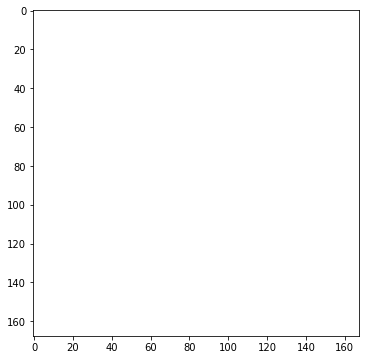

KeyboardInterrupt: ignored

In [73]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

###Staring the Model training Session
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, _ = df.train.next_batch(batch_size)
        
        # Generate noise to feed to the generator
        noise_temp = np.random.uniform(-1., 1., size=[batch_size, noise_dim])
        
        # Run optimization op (backprop)
        feed_dict = {disc_inp: batch_x, gen_inp: noise_temp}
        _, _, gl, dl = sess.run([training_gen, training_disc, cost_gen, cost_disc],
                            feed_dict=feed_dict)
        if step % 2000 == 0 or step == 1:
            clear_output()
            print('Step %i: Generator Loss: %f, Discriminator Loss: %f' % (step, gl, dl))
             # Generating the  images using the generator network
            n = 6
            canvas = np.empty((28 * n, 28 * n))

            for i in range(n):
              # Noise input.
              z = np.random.uniform(-1., 1., size=[n, noise_dim])
              # Generate image from noise.
              g = sess.run(gen_out, feed_dict={gen_inp: z})
              # Reverse colours for better display
              g = -1 * (g - 1)
              for j in range(n):
                # Draw the generated digits
                canvas[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

            plt.figure(figsize=(n, n))
            plt.imshow(canvas, origin="upper", cmap="gray")
            plt.show()
    print("Finished!")
    
    
